
# Histogram of Oriented Gradients

Histogram of oriented gradients (HOG) is a feature descriptor used in computer vision and image processing for the purpose of object detection. The technique counts occurrences of gradient orientation in localized portions of an image. However, we can also use HOG descriptors for quantifying and representing both shape and texture.

## What is a Feature Descriptor ?
A feature descriptor is a representation of an image or an image patch that simplifies the image by extracting useful information and throwing away irrelevant information.
Typically, a feature descriptor converts an image of size width x height x 3 (channels ) to a feature vector / array of length n.

What is “useful” and what is “irrelevant” ? To define “useful”, we need to know that the informations (i.e features) are not useful for the purpose of viewing the image. But, are useful for tasks like image recognition and object detection. The features produced by this algorithm when fed into an image classification algorithms like Support Vector Machine (SVM) produce good results.

But, what kinds of “features” are useful for classification tasks ? 
### Let’s use an illustration. 
1. Suppose we want to build an object detector that detects buttons of shirts and coats. A button is circular ( may look elliptical in an image ) and usually has a few holes for sewing. You can run an edge detector on the image of a button, and easily tell if it is a button by simply looking at the edge image alone. In this case, edge information is “useful” and color information is not.
2. The images below shows how HOG extracted useful features (edges) and throw away the irrelevant feature (color etc.)
![EDGES OF CAR LOGOS PRODUCED FROM HOG](https://i.imgur.com/ZkkoBpK.jpg)
<fig>Figure 1: EDGES OF CAR LOGOS PRODUCED FROM HOG.</fig>

In addition, the features also need to have discriminative power. For example, good features extracted from an image should be able to tell the difference between buttons and other circular objects like coins and car tires.
### Real Life Application of H.O.G
Pedestrian detection in static images, Human detection in videos, as well as to a variety of common animals and vehicles in static imagery etc.

Algorithm overview
------------------

Compute a Histogram of Oriented Gradients (HOG) by

1. (optional) global image normalisation
2. computing the gradient image in x and y
3. computing gradient histograms
4. normalising across blocks
5. flattening into a feature vector


## Below is  how to compute HOG descriptor using scikit-image

The most important parameters for the HOG descriptor are the *orientations* ,  *pixels_per_cell* , and the  *cells_per_block* . These three parameters (along with the size of the input image) effectively control the dimensionality of the resulting feature vector.
1. <b>Orientations (Number of orientation bins)</b>: This stage, the image gradient of x and y direction will be computed. The orientation of the gradient for each pixel in the input image can  be computed by:<br>&Theta; = *arctan*2(G<sub>y</sub>, G<sub>x</sub>)<br>Given both |G| and &Theta;, histogram of oriented gradients can be computed, where the bin of the histogram is based on &Theta; and the contribution or weight added to a given bin of the histogram is based on |G|. i.e each pixel in the image consist of bin of histogram which will be computed.

2. <b>Pixels_per_cell (Size (in pixels) of a cell)</b>: If the number of orientations bins have been given, the image will be divided into cells and blocks. <p>A “cell” is a rectangular region defined by the number of pixels that belong in each cell.</p>For example, if we had a 128 x 128 image and defined our  pixels_per_cell  as 4 x 4, we would thus have 32 x 32 = 1024 cells in the image.
3. <b>Cells_per_block (Number of cells in each block)</b>: For changes in illumination and contrast, the gradient values will be normalized locally by grouping the “cells” together into larger, connecting “blocks” which may overlap, meaning that each cell contributes to the final feature vector more than once. For each of the cells in the current block the corresponding gradient histograms will be merged, followed by either L1 or L2 normalizing the entire merged feature vector. Finally, after all blocks are normalized, we take the resulting histograms, concatenate them, and treat them as our final feature vector.
### Other parameters
<b>block_norm : </b>Block normalization method. <br>
<b>transform_sqrt : </b>this parameter applies power law compression to normalize the image before processing.

In [1]:
# import the necessary packages
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import exposure

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'Histogram of Oriented Gradients')

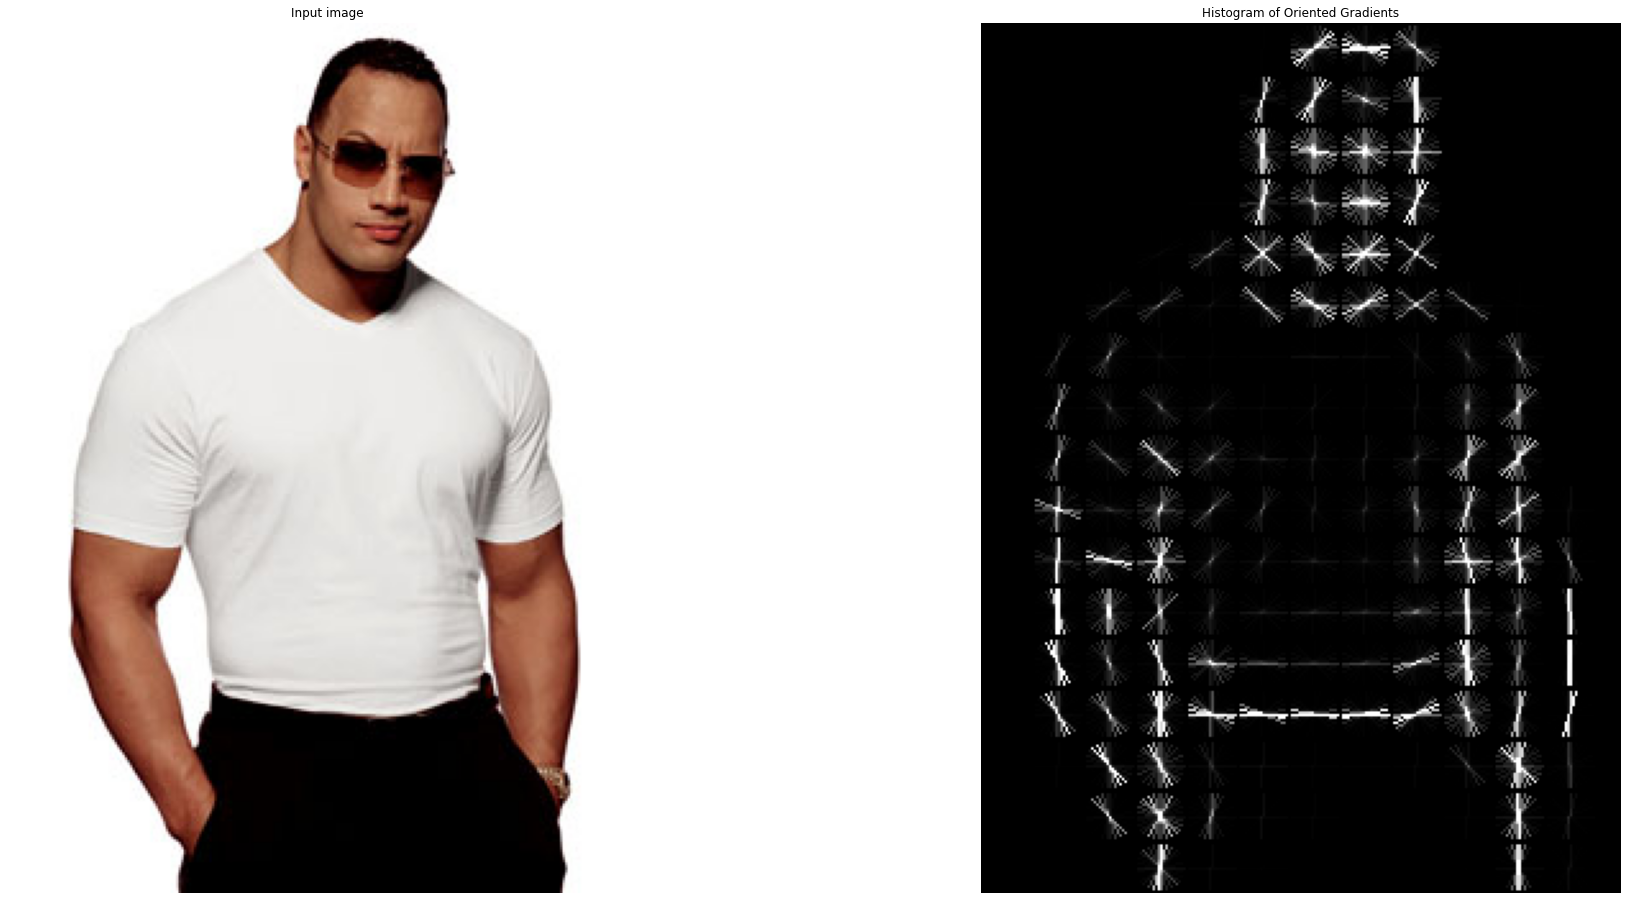

In [7]:

# Dalal and Triggs report that using either 2 x 2 or 3 x 3  cells_per_block  obtains reasonable accuracy in most cases.
file  = "/content/drive/MyDrive/Spark IIT Roorkee/HOG,RCNN,faster RCNN/Resources/The_ROCK.jpg"
image = plt.imread(file)

fd, hog_image = hog(image, orientations=15, pixels_per_cell=(20, 20),
                    cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=False)
# display the image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 16), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
# display the HOG features
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

<fig>Figure 2: VISUALIZING THE HOG DESCRIPTOR. IT MAY NOT BE A PERFECT REPRESENTATION OF THE HOG FEATURE VECTOR, BUT IT CAN LEND SOME INSIGHT INTO THE IMPACT YOUR PARAMETER CHOICES MAKE.</fig>

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

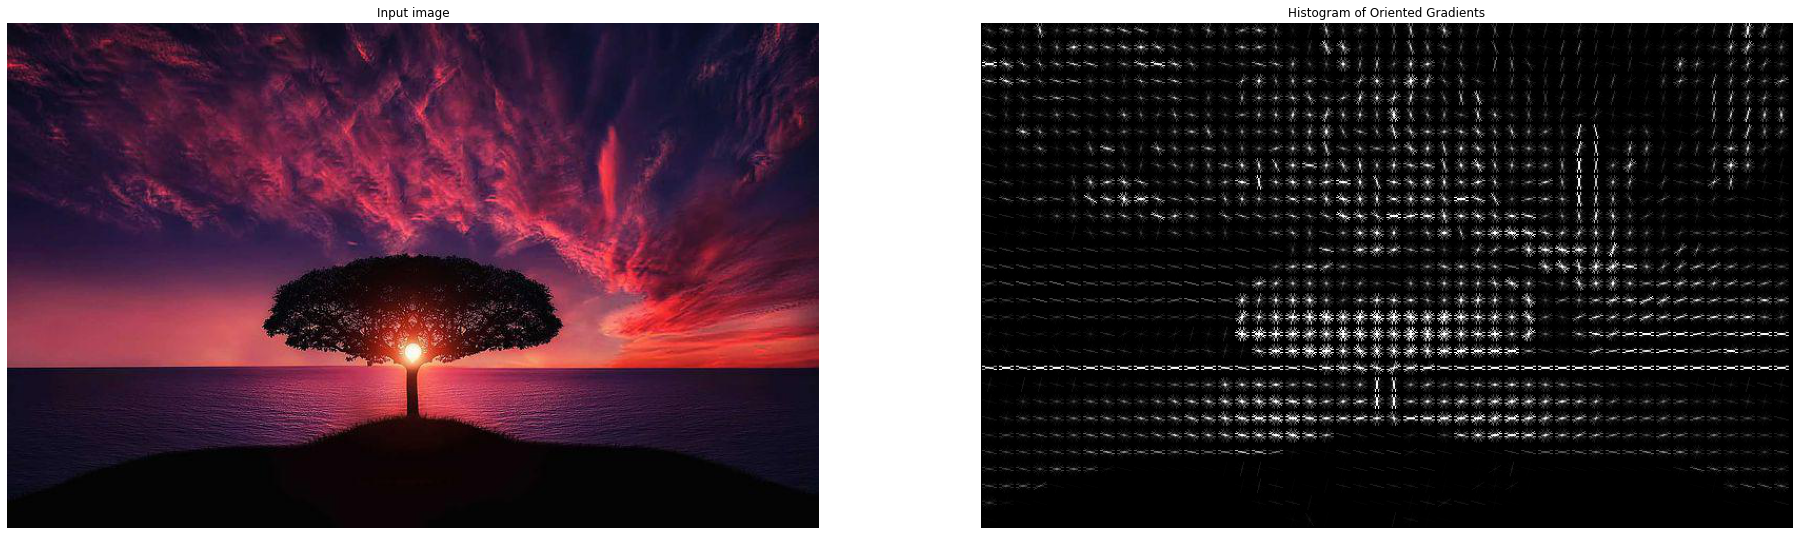

In [6]:
file2  = "/content/drive/MyDrive/Spark IIT Roorkee/HOG,RCNN,faster RCNN/Resources/tree.jpg"
image2 = plt.imread(file2)

fd, hog_image = hog(image2, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=False)
# display the image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 16), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image2, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
# display the HOG features
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')


<fig>Figure 3: VISUALIZING A SHAPE. THIS IS A PERFECT REPRESENTATION OF THE HOG FEATURE VECTOR, IT EXTRACTED THE USEFUL FEATURE (EDGES), AND REMOVES THE IRRELEVANT FEATURE (COLOR).</fig>

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

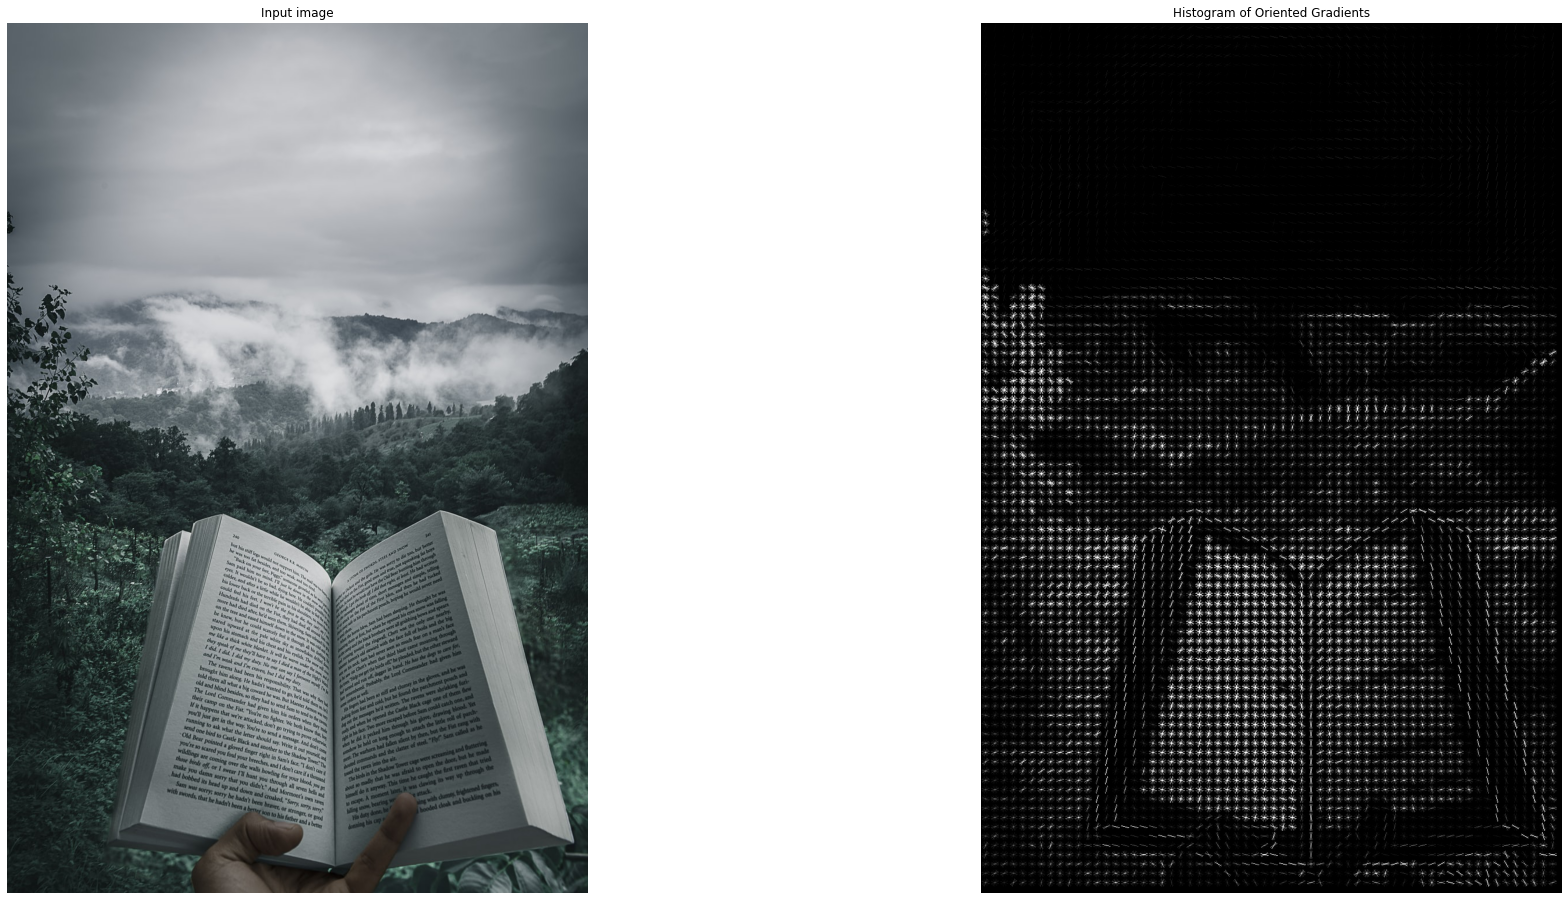

In [8]:
file2  = "/content/drive/MyDrive/Spark IIT Roorkee/HOG,RCNN,faster RCNN/Resources/cloud.jpg"
image2 = plt.imread(file2)

fd, hog_image = hog(image2, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=False)
# display the image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 16), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image2, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
# display the HOG features
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

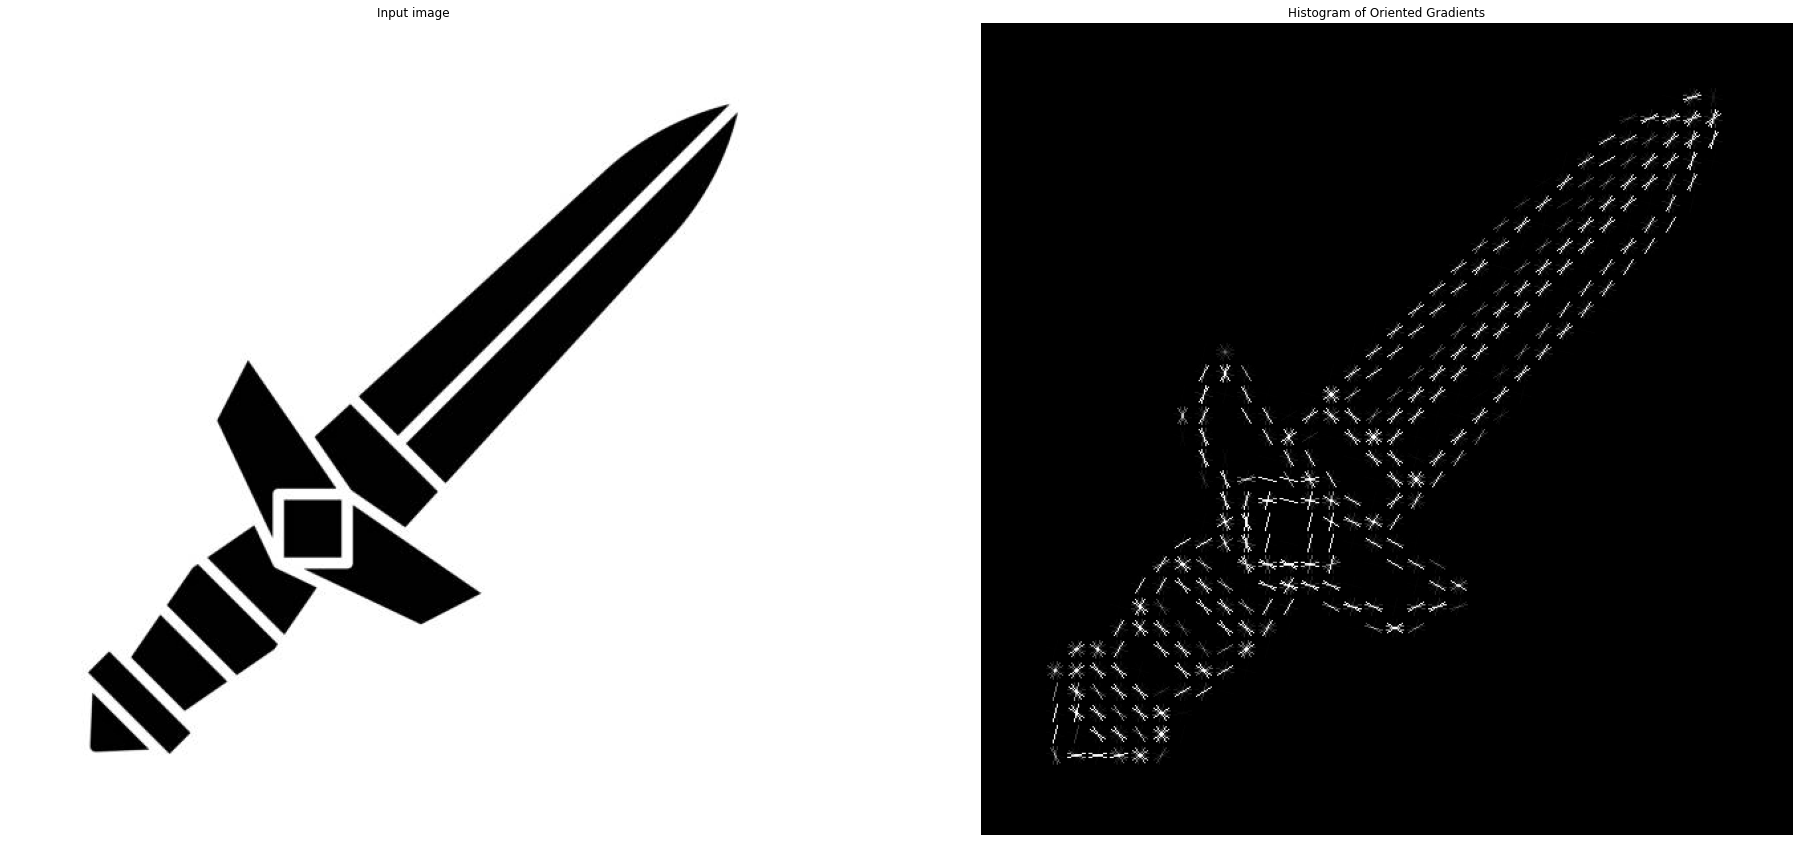

In [9]:
file2  = "/content/drive/MyDrive/Spark IIT Roorkee/HOG,RCNN,faster RCNN/Resources/sword.jpg"
image2 = plt.imread(file2)

fd, hog_image = hog(image2, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=False)
# display the image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 16), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image2, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
# display the HOG features
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')